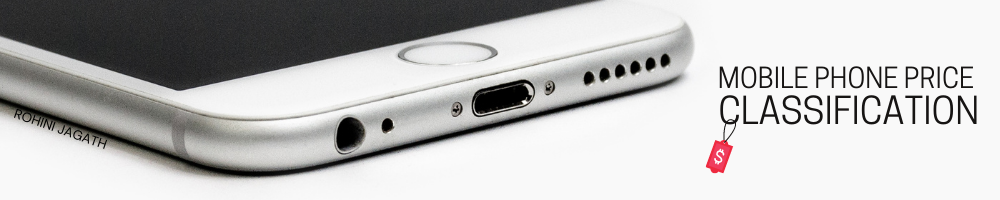

In [2]:
# general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# machine learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

C:\Users\User-PC\Documents\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Data Preparation
## Data Description & Basics
The data comprises the specifications of 2000 mobile phones. No null values are present.

### Predictor Variables
- 'battery_power': batter power in mAh (milli-Ampere hour)
- 'blue': bluetooth available
- 'clock_speed': processer speed in gigahertz 
- 'dual_sim': dual sim functionality avaialble
- 'fc': megapixels of front facing camera
- 'four_g': 4G availability
- 'int_memory': amount of internal memory available in gigabiytes
- 'm_dep': depth of the phone in centimeters
- 'mobile_wt': weight of the phone in grams
- 'n_cores': number of processor cores
- 'pc': megapixels of primary camera
- 'px_height': height in pixels
- 'px_width': width in pixels
- 'ram': phone ram in GB
- 'sc_h': screen height
- 'sc_w': screen width
- 'talk_time': talk time duration of the phone's battery
- 'three_g': 3G availability
- 'touch_screen': touchscreen availability
- 'wifi': wifi availability

### Target Variable
- 'price_range': price class of the phone

## Data Types
All datatypes are numeric, no conversion or encoding is required.

In [5]:
# statistics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Exploratory Data Analysis

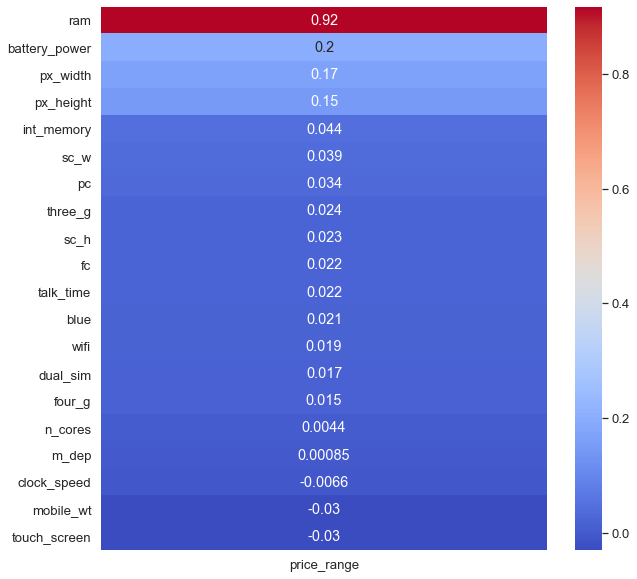

In [6]:
# plot heatmap showing correlation of features to target: 'price'
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
sns.heatmap(df.corr()[['price_range']].sort_values('price_range', ascending=False)[1:],
            annot=True,cmap='coolwarm');

#### Observations:

- Almost a one to one positive correlation is noted between ram and prices range (0.92).
- There appears to be almost an exclusive correlation with ram and little to no correlation with other variables
- If other relationships or influential factors do exist they will be uncovered through machine learning.

## Multicollinearity

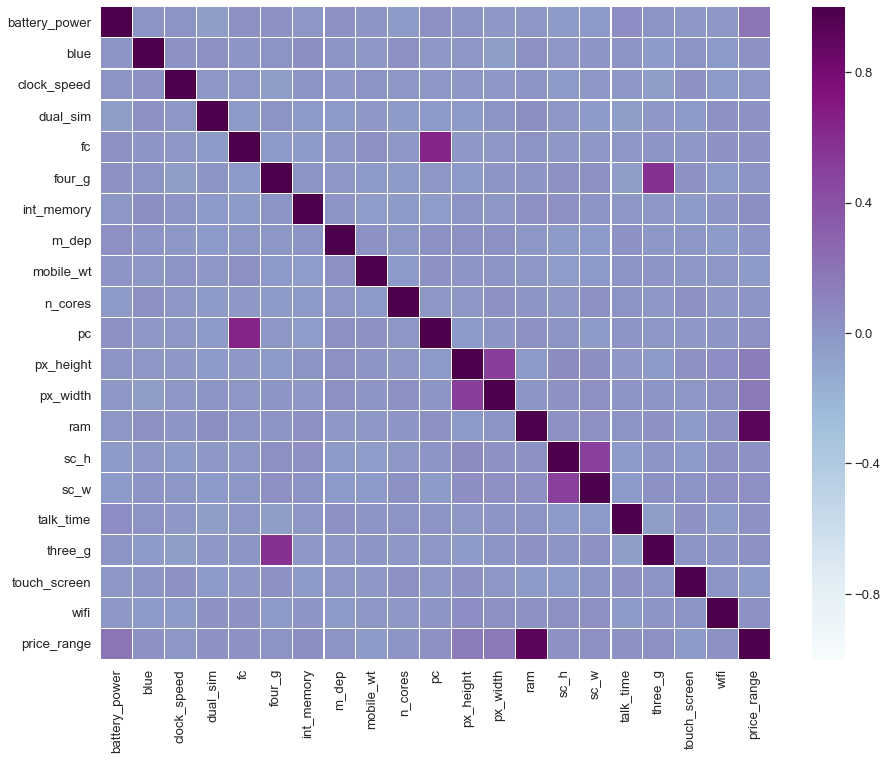

In [8]:
# plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BuPu', linewidth=0.1);

**Observations:**
- Some Multicollinearity is noted for the variables:
    - 3G & 4G as expected as if a phone has 4G capabilities it should have 3G (0.58)
    - Screen height and width 
    - Pixel height and width
    - Front camera and Primary Camera

## Predictor Variable Distribution

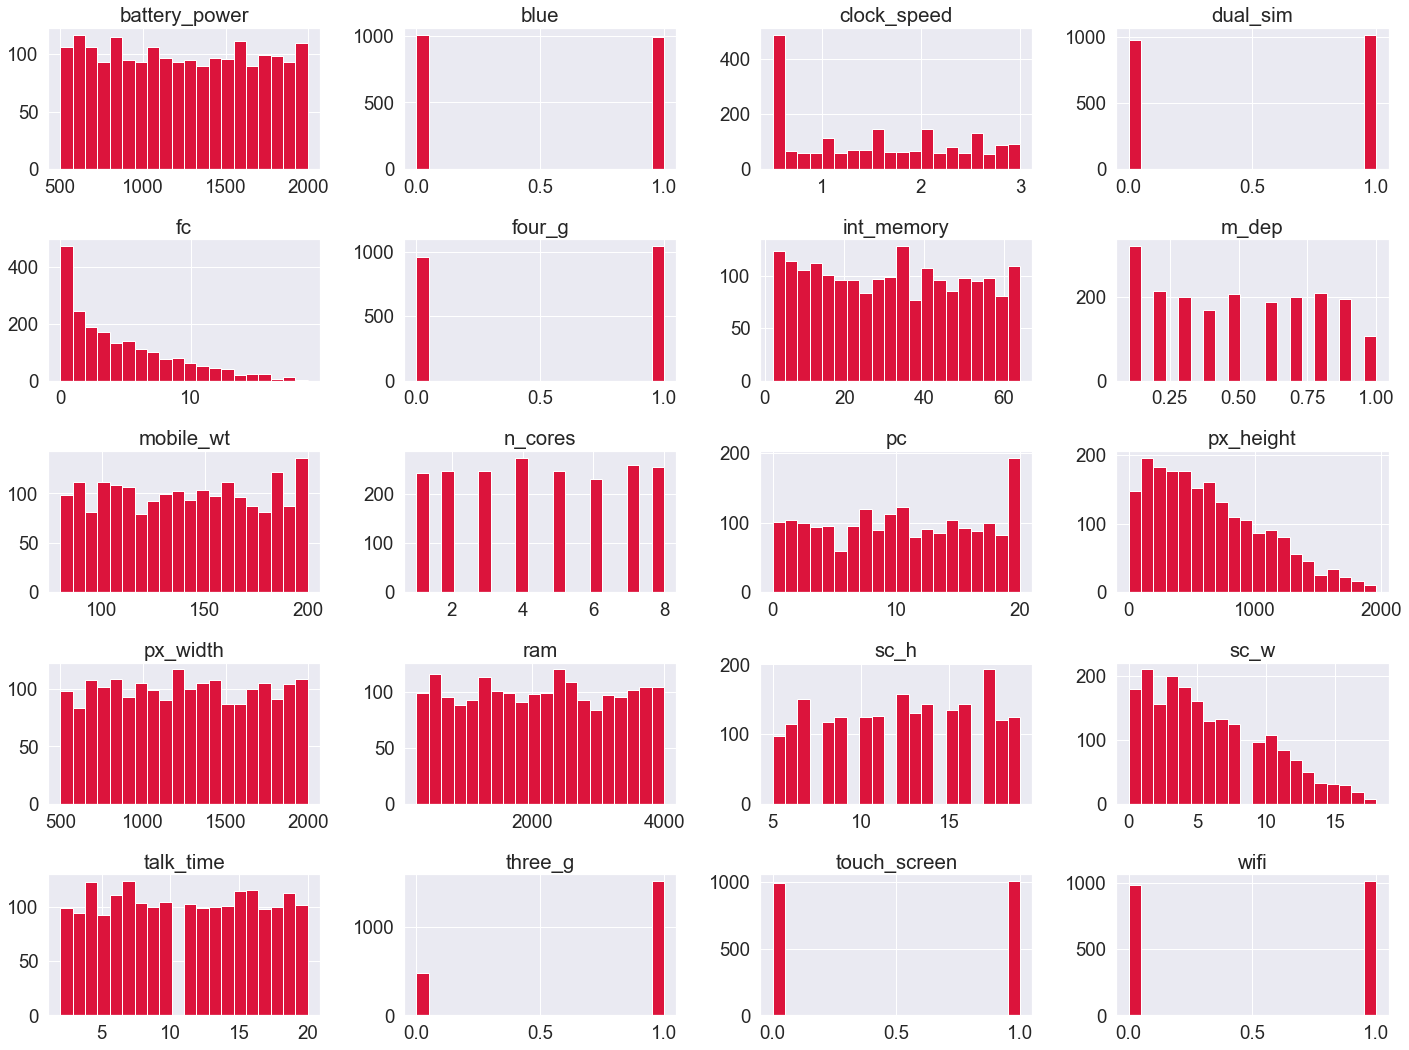

In [10]:
sns.set(font_scale=1.7)
df_h = df.drop('price_range', axis=1)
df_h.hist(bins=20, figsize=(20, 15), color='crimson')
plt.tight_layout()

#### Observations:
- Close to uniform distribution for most features showing that the range of phones in the dataset covers a wide spectrum of consumer needs and requirements. 
- This would ideally result in a wider range of prices which means consumers would find a suitable phone depending on their individual needs and budget.

## Target Variable Data Balance

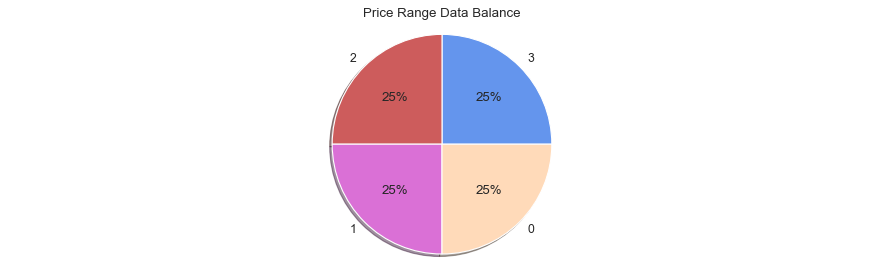

In [11]:
# initialise class labels and values
classes = [3, 2, 1, 0]
values = list(df.price_range.value_counts())

# plot pie chart of class distribution
sns.set(font_scale=1)
fig1, ax1 = plt.subplots(figsize=(14, 4), dpi=80)
ax1.pie(values, labels=classes, autopct='%0.0f%%',
        shadow=True, startangle=0,
        colors=['cornflowerblue', 'indianred', 'orchid', 'peachpuff'])
ax1.axis('equal')
plt.title('Price Range Data Balance');

#### Observations:
- The dataset contains an equal number of observations per price class.

## Exploring Some Features
### 4G & 3G Capabilities
From the histograms, we identify a sect of phones that have no 3G or 4G capabilities. Let's investigate further.

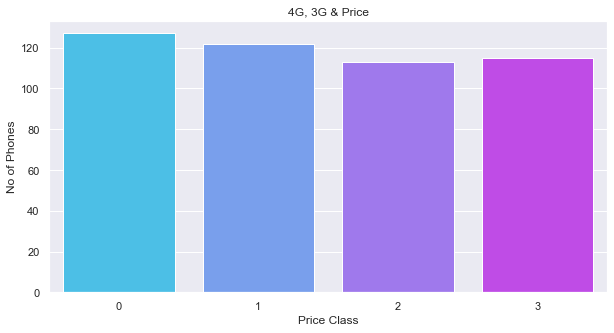

In [13]:
# filter dataframe to include phones with no 3G or 4G
df1 = df[(df['four_g'] == 0) & (df['three_g'] == 0)]
# create countplot of phone price ranges with n
plt.figure(figsize=(10, 5))
sns.countplot(x=df1.price_range, palette='cool')
plt.xlabel('Price Class')
plt.ylabel('No of Phones')
plt.title('4G, 3G & Price');

#### Observations:
- Phones that do not have any 3G or 4G capabilities are well distributed among the four price classes.
- These phones could comprise either 2G, 5G or phones with no mobile data functionality, hence the distribution among all classes.
- There is a slightly higher number of phones that fall into the cheapest price class.


### Distribution of Battery Power by Class

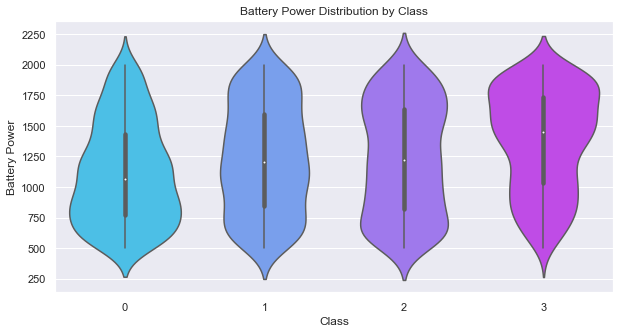

In [14]:
# create violin plot of Battery power distribution per class
plt.figure(figsize=(10, 5))
sns.violinplot(x=df.price_range, y=df.battery_power, palette='cool')
plt.xlabel('Class')
plt.ylabel('Battery Power')
plt.title('Battery Power Distribution by Class');

#### Observations:
- Significant difference in battery power distribution between Class 0 and Class 3. 
- As expected Class three has more phones with higher battery power, tapering downwards. Class 0 has more phones with lower battery power and tapers upwards.
- Class 1 & 2 have similar distributions, showing that mid range phones cover a wide spectrum of battery power.

### Distribution of RAM by Class

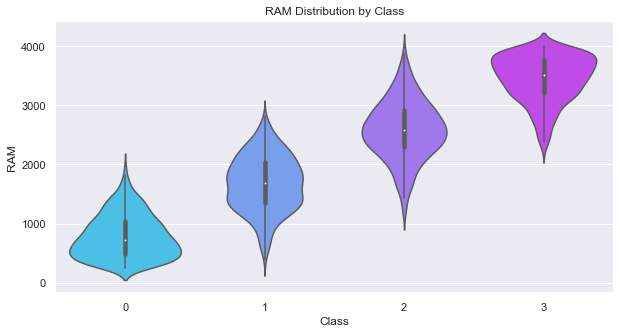

In [15]:
# create violin plot of RAM distribution per class
plt.figure(figsize=(10, 5))
sns.violinplot(x=df.price_range, y=df.ram, palette='cool')
plt.xlabel('Class')
plt.ylabel('RAM')
plt.title('RAM Distribution by Class');

#### Observations:
- The high correlation of RAM and price class is clearly represented.
- Each class has a specific range of RAM capacity:
    - Class 0 ranging from 256-1974,
    - Class 1 ranging from 387-2811,
    - Class 2 ranging from 1185-3916 &
    - Class 3 ranging from 2259-3998.

### RAM & Internal Memory

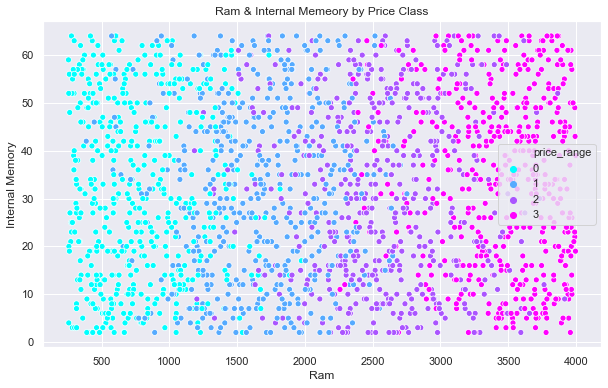

In [16]:
# create scatter plot of ram & internal memory
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.ram,
                y=df.int_memory,
                data=df,
                hue=df.price_range,
                palette='cool')
plt.xlabel('Ram')
plt.ylabel('Internal Memory')
plt.title('Ram & Internal Memeory by Price Class');

#### Observations:
- From the scatter graph we observe the separation of the classes by RAM once again (cyan, blue, purple and magenta sections).
- A few outliers in each range of RAM noted for Class 0 and Class 3.
- The purple and blue points are more scattered within the middle range, showing that these may be the classes the model would misclassify more often.
- Each price range coveres a range of internal memory values showing that RAM is the key distinguishing factor between price ranges, with the exception of a few outliers.

### Additional Features

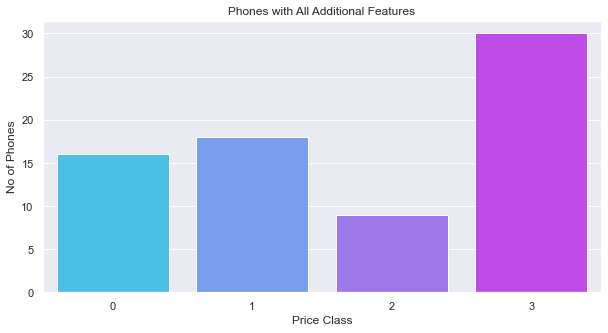

In [17]:
# create bar plot of price distribution phone features
plt.figure(figsize=(10, 5))
df1 = df[(df['four_g'] == 1) & (df['blue'] == 1) & (df['wifi'] == 1) & (df['dual_sim'] == 1) & (df['touch_screen'] == 1)]
sns.countplot(x=df1.price_range, palette='cool')
plt.xlabel('Price Class')
plt.ylabel('No of Phones')
plt.title('Phones with All Additional Features');

#### Observations:
- The majority of phones that have all the bells and whistles (4G, bluetooth, wifi, dual sim, touchscreens) fall into the most expensive price range (3) however there do seem to be other phones that are more budget friendly. 
- These phones more than likely compromise on RAM or battery power.

# Data Pre-processing
## Features & Targets

In [18]:
X = df.drop('price_range', axis=1)

y = df['price_range']

## Test Train Split

In [19]:
# Splitting the data in a test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101 )

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 20)
(1600,)
(400, 20)
(400,)


## Scaling 

In [21]:
# Scale train and test using standard scaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

# scale X using standard scaler
X_s = StandardScaler().fit_transform(X)

# Machine Learning
## Models
_____________________________________________________
## 1. SVC

In [23]:
# create svc model object & train model
from sklearn.svm import SVC
cl_svc = SVC(random_state=101)
model_svc = cl_svc.fit(X_train, y_train)

# predict
y_pred_svc= model_svc.predict(X_test)

print(classification_report(y_test, model_svc.predict(X_test),
                            target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        94
           1       0.90      0.95      0.92       102
           2       0.97      0.90      0.94       120
           3       0.97      0.99      0.98        84

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



_____________________________________________________
## 2. Logistic Regression

In [24]:
# create logistic regression model object & train model
cl_lr = LogisticRegression()
model_lr = cl_lr.fit(X_train_s, y_train)

# predict
y_pred_lr= model_lr.predict(X_test_s)

print(classification_report(y_test, model_lr.predict(X_test_s),
                            target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.88      0.96      0.92       102
           2       0.96      0.84      0.90       120
           3       0.90      0.98      0.94        84

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



_____________________________________________________
## 3. Decision Tree

In [25]:
# create decision tree model object & train model
cl_dt = DecisionTreeClassifier(random_state=101)
model_dt = cl_dt.fit(X_train, y_train)

# predict
y_pred_dt = model_dt.predict(X_test)

print(classification_report(y_test, model_dt.predict(X_test),
                            target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        94
           1       0.73      0.83      0.78       102
           2       0.86      0.74      0.79       120
           3       0.86      0.93      0.89        84

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.83      0.83       400



_____________________________________________________
## 4. Random Forest

In [26]:
# create random forest model object & train model
cl_rf = RandomForestClassifier(n_estimators=25, random_state=101)
model_rf = cl_rf.fit(X_train, y_train)

# predict
y_pred_rf = model_rf.predict(X_test)

print(classification_report(y_test, model_rf.predict(X_test),
                            target_names=['0', '1', '2', '3']))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        94
           1       0.81      0.85      0.83       102
           2       0.88      0.84      0.86       120
           3       0.92      0.94      0.93        84

    accuracy                           0.88       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.88      0.88      0.88       400



## Model Evaluation
### F1 Scores

- Overall all models perform reasonably well, this is attributed to the high correlation of RAM to the target variable.
- SVC and Logistic regression perform the best achieving a 0.95 macro average f1 score.

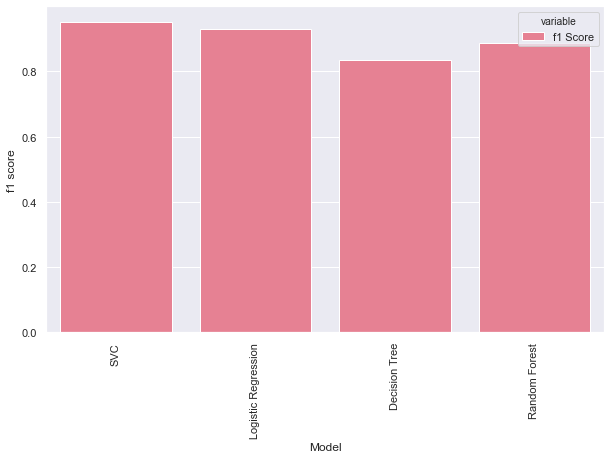

In [27]:
# initialise training and test error dataframe
models = ['SVC', 'Logistic Regression', 'Decision Tree', 'Random Forest']

training_f1 = [f1_score(y_test, y_pred_svc, average='macro'),
               f1_score(y_test, y_pred_lr, average='macro'),
               f1_score(y_test, y_pred_dt, average='macro'),
               f1_score(y_test, y_pred_rf, average='macro')]

f1sc_df = pd.DataFrame({'Model': models,
                        'f1 Score': training_f1})

# plot rmse for all models
plt.figure(figsize=(10, 6))
sns.set()
sns.barplot(x='Model', y='value', hue='variable',
            data=pd.melt(f1sc_df, id_vars=['Model']), palette='husl')
plt.xticks(rotation=90)
plt.ylabel('f1 score');

### Confusion Matrices

In [28]:
def evaluation(y_pred, y_test, ax):
    """
    This function will print out a classification report 
    and create a normalized confusion matrix styled as a heatmap
    displayed with a title specified by the user, given the predicted labels

    parameters: y_pred (array)
                y_test  (array)
                ax (axes for plot)

    output: Confusion matrix of predictions vs results  
    """

    # Generate a normalized confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

    # Display the confusion matrix as a heatmap
    heat = sns.heatmap(cm_norm, 
                      cmap="rocket_r", 
                      vmin=0., 
                      vmax=1., 
                      annot=True, 
                      annot_kws={'size':10},
                      ax=ax)
    return heat

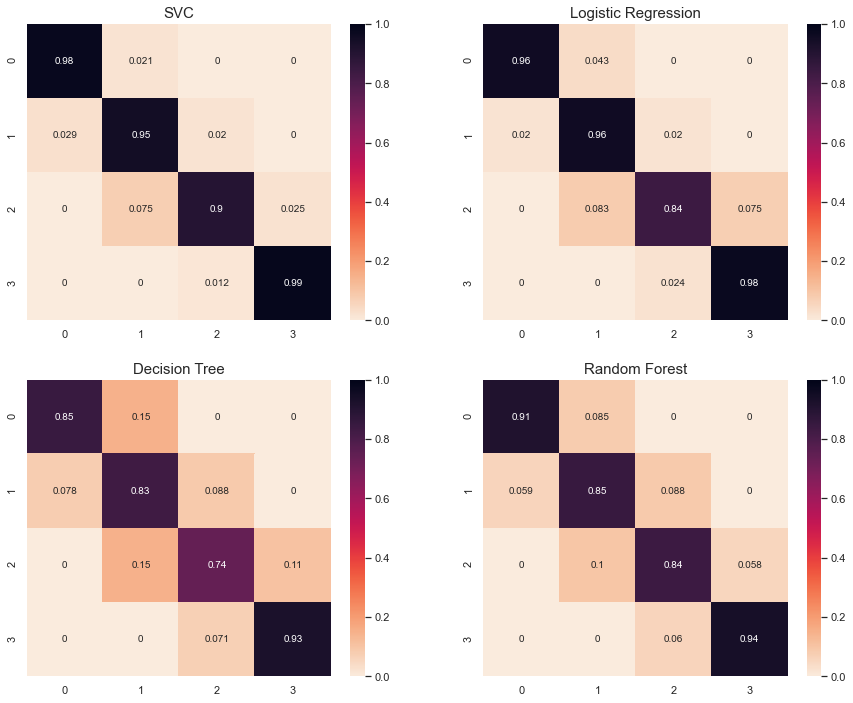

In [29]:
# Plot the confusion matrices for each model
f, axes = plt.subplots(2, 2, figsize=(15, 12))
evaluation(y_pred_svc, y_test, axes[0,0])
evaluation(y_pred_lr, y_test,  axes[0,1])
evaluation(y_pred_dt, y_test, axes[1,0])
evaluation(y_pred_rf, y_test, axes[1,1])

# Add figure headings
axes[0,0].set_title('SVC', fontsize=15)
axes[0,1].set_title('Logistic Regression', fontsize=15)
axes[1,0].set_title('Decision Tree', fontsize=15)
axes[1,1].set_title('Random Forest', fontsize=15);

- From the confusion matrices we observe that SVC and Logistic Regression perform similarly in classifying Class 0 and 3.
- As theorised, Class 1 and 2 are a bit harder to classify as there is more overlap with the most significant feature, RAM. - Class 1 and 2 have more misclassified observations for all models.
- SVC has a lower number of misclassifications for these classes overall, and would therefore be the selected model.

# Hyperparameter Tuning
The following parameters were selected for hyperparameter tuning of the best model using Grid Search, which is an exhaustive search through a specified subset of hyperparameters:
<br>
* **C** - Regularization parameter
<br>

The Grid Search is conducted using the whole training set and includes cross validation to determine the best parameters for the specified scoring metric.

In [30]:
# create parameter grid
param_grid = {'C': [0.1, 1.0, 10.0, 100]}

f1 = make_scorer(f1_score, average='macro')
# defining the grid search object
grid = GridSearchCV(estimator=SVC(max_iter=5000),
                    param_grid=param_grid,
                    scoring=f1,
                    cv=5)

# fitting train sets and displaying best score and best parameters for model
grid_result = grid.fit(X, y)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9675403682175847
Best Params:  {'C': 100}


# Conclusion
- The price range of a mobile phone can be determined with high confidence.
- Most important feature that determines price is the RAM of the phone.

# References

1. https://datareportal.com/global-digital-overview